# SimpleLinearRegression on Energy Dataset


### - What is Simple Linear Regression?
Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
The other variable, denoted y, is regarded as the response, outcome, or dependent variable.
Because the other terms are used less frequently today, we'll use the "predictor" and "response" terms to refer to the variables encountered in this course. The other terms are mentioned only to make you aware of them should you encounter them in other arenas. Simple linear regression gets its adjective "simple," because it concerns the study of only one predictor variable. In contrast, multiple linear regression, which we study later in this course, gets its adjective "multiple," because it concerns the study of two or more predictor variables.

In [6]:
import pandas as pd
import urllib
from urllib import request
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
import numpy as np
import sklearn 
from sklearn import preprocessing
from random import seed
from random import randrange
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time
url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"
data = pd.read_csv(url)
data['date'] = pd.to_datetime(data['date'])
data['year'], data['month'] , data['time'] , data['hour'] ,data['day'] , data['day_of_week'],data['Numerical_Week'] = data['date'].dt.year, data['date'].dt.month , data['date'].dt.time , data['date'].dt.hour , data['date'].dt.day , data['date'].dt.weekday_name,data['date'].dt.weekday

data['WeekStatus'] = np.where(data['Numerical_Week'] < 5, 'Weekday', 'Weekend')
data['weekStatus'] = np.where(data['Numerical_Week'] < 5, 0 , 1)
d = data.date[0:len(data.date)]
data_final = []
for i in range (len(d)):
    if(i==0):
        a= 61200
        data_final.append(a)
    elif(i>0):
        a=a+600
        data_final.append(a)

data["NSM"] = pd.DataFrame({'NSM':data_final})

data.head(50)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,year,month,time,hour,day,day_of_week,Numerical_Week,WeekStatus,weekStatus,NSM
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,2016,1,17:00:00,17,11,Monday,0,Weekday,0,61200
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,2016,1,17:10:00,17,11,Monday,0,Weekday,0,61800
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,2016,1,17:20:00,17,11,Monday,0,Weekday,0,62400
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,2016,1,17:30:00,17,11,Monday,0,Weekday,0,63000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,2016,1,17:40:00,17,11,Monday,0,Weekday,0,63600
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,2016,1,17:50:00,17,11,Monday,0,Weekday,0,64200
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,2016,1,18:00:00,18,11,Monday,0,Weekday,0,64800
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,2016,1,18:10:00,18,11,Monday,0,Weekday,0,65400
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,2016,1,18:20:00,18,11,Monday,0,Weekday,0,66000
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,2016,1,18:30:00,18,11,Monday,0,Weekday,0,66600


In [2]:
data1 = data.set_index('date')
data1 = data1.drop('Appliances', 1)
data1 = data1.drop('day_of_week',1)
data1 = data1.drop('WeekStatus',1)
data1 = data1.drop('time',1)
data1 = data1.drop('NSM',1)


data1.head(5)


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Visibility,Tdewpoint,rv1,rv2,year,month,hour,day,Numerical_Week,weekStatus
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,63.000000,5.3,13.275433,13.275433,2016,1,17,11,0,0
2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,59.166667,5.2,18.606195,18.606195,2016,1,17,11,0,0
2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,55.333333,5.1,28.642668,28.642668,2016,1,17,11,0,0
2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,51.500000,5.0,45.410389,45.410389,2016,1,17,11,0,0
2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,47.666667,4.9,10.084097,10.084097,2016,1,17,11,0,0


Estimated coefficients:
b_0 = -5.817915095462922e-06            
b_1 = 4.504859817246594


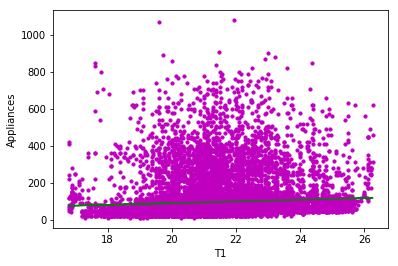

In [3]:
def estimate_coef(x,y):
    n = np.size(x) #calculating the points
    m_x,m_y = np.mean(x), np.mean(y) #mean of response and featue variable
    SS_xy = np.sum(y*x - n*m_y*m_x) #  cross-deviation 
    SS_xx = np.sum(x*x - n*m_x*m_x) # deviation about x
    b_1 = SS_xy / SS_xx # Regression coeffients
    b_0 = m_y - b_1*m_x
    return(b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 10)
     # predicted response vector
    y_pred = b[0] + b[1]*x #USING LINEAR EQAUTION TO UNDERSTAND THE relations between two continous Entity
     # plotting the regression line
    plt.plot(x, y_pred, color = "g")
    # function to show plot
    plt.show()
#Energy used on the basis of temperature T1
def main():
    # observations
    x = data.T1
    y = data.Appliances
 
    # estimating coefficients
    b = estimate_coef(x, y)
    plt.xlabel('T1')
    plt.ylabel('Appliances')
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
    
    
if __name__ == "__main__":
    main()

In [4]:
from statsmodels.formula.api import ols
model = ols("data.Appliances ~ data.T1 ", data).fit()#Where data.T1 is an exogenues
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        data.Appliances   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     60.85
Date:                Fri, 16 Mar 2018   Prob (F-statistic):           6.45e-15
Time:                        17:51:58   Log-Likelihood:            -1.1935e+05
No. Observations:               19735   AIC:                         2.387e+05
Df Residuals:                   19733   BIC:                         2.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9343      9.867      2.122      0.0

## Understanding the Regression Anaysis of OLS

Brief review of regression
Remember that regression analysis is used to produce an equation that will predict a dependent variable using one or more independent variables. This equation has the form

Y = b1X1 + b2X2 + ... + A
where Y is the dependent variable you are trying to predict, X1, X2 and so on are the independent variables you are using to predict it, b1, b2 and so on are the coefficients or multipliers that describe the size of the effect the independent variables are having on your dependent variable Y, and A is the value Y is predicted to have when all the independent variables are equal to zero.

In the Stata regression shown below, the prediction equation is price = -294.1955 (mpg) + 1767.292 (foreign) + 11905.42 - telling you that price is predicted to increase 1767.292 when the foreign variable goes up by one, decrease by 294.1955 when mpg goes up by one, and is predicted to be 11905.42 when both mpg and foreign are zero.

<img src="stata_regression_output1.jpg">
Coming up with a prediction equation like this is only a useful exercise if the independent variables in your dataset have some correlation with your dependent variable. So in addition to the prediction components of your equation--the coefficients on your independent variables (betas) and the constant (alpha)--you need some measure to tell you how strongly each independent variable is associated with your dependent variable.

When running your regression, you are trying to discover whether the coefficients on your independent variables are really different from 0 (so the independent variables are having a genuine effect on your dependent variable) or if alternatively any apparent differences from 0 are just due to random chance. The null (default) hypothesis is always that each independent variable is having absolutely no effect (has a coefficient of 0) and you are looking for a reason to reject this theory.

P, t and standard error
The t statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. If a coefficient is large compared to its standard error, then it is probably different from 0.

How large is large? Your regression software compares the t statistic on your variable with values in the Student's t distribution to determine the P value, which is the number that you really need to be looking at. The Student's t distribution describes how the mean of a sample with a certain number of observations (your n) is expected to behave.

<img src="stata_regression_output2.jpg">

If 95% of the t distribution is closer to the mean than the t-value on the coefficient you are looking at, then you have a P value of 5%. This is also reffered to a significance level of 5%. The P value is the probability of seeing a result as extreme as the one you are getting (a t value as large as yours) in a collection of random data in which the variable had no effect. A P of 5% or less is the generally accepted point at which to reject the null hypothesis. With a P value of 5% (or .05) there is only a 5% chance that results you are seeing would have come up in a random distribution, so you can say with a 95% probability of being correct that the variable is having some effect, assuming your model is specified correctly.

The 95% confidence interval for your coefficients shown by many regression packages gives you the same information. You can be 95% confident that the real, underlying value of the coefficient that you are estimating falls somewhere in that 95% confidence interval, so if the interval does not contain 0, your P value will be .05 or less.

Note that the size of the P value for a coefficient says nothing about the size of the effect that variable is having on your dependent variable - it is possible to have a highly significant result (very small P-value) for a miniscule effect.

Coefficients
In simple or multiple linear regression, the size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect. In regression with a single independent variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one. In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant. Remember to keep in mind the units which your variables are measured in.

Note: in forms of regression other than linear regression, such as logistic or probit, the coefficients do not have this straightforward interpretation. Explaining how to deal with these is beyond the scope of an introductory guide.

R-Squared and overall significance of the regression
The R-squared of the regression is the fraction of the variation in your dependent variable that is accounted for (or predicted by) your independent variables. (In regression with a single independent variable, it is the same as the square of the correlation between your dependent and independent variable.) The R-squared is generally of secondary importance, unless your main concern is using the regression equation to make accurate predictions. The P value tells you how confident you can be that each individual variable has some correlation with the dependent variable, which is the important thing.

Another number to be aware of is the P value for the regression as a whole. Because your independent variables may be correlated, a condition known as multicollinearity, the coefficients on individual variables may be insignificant when the regression as a whole is significant. Intuitively, this is because highly correlated independent variables are explaining the same part of the variation in the dependent variable, so their explanatory power and the significance of their coefficients is "divided up" between them.

Estimated coefficients:
b_0 = -0.0011150949734002324            
b_1 = 8.49383240994969


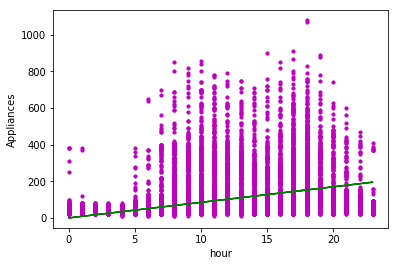

In [5]:
#Energy used depending upon the hour
def main():
    # observations
    x = data.hour
    y = data.Appliances
 
    # estimating coefficients
    b = estimate_coef(x, y)
    plt.xlabel('hour')
    plt.ylabel('Appliances')
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
    
if __name__ == "__main__":
    main()

In [6]:
from statsmodels.formula.api import ols
model = ols("data.Appliances ~ data.hour ", data).fit()#Where data.hour is an exogenues
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        data.Appliances   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     973.2
Date:                Fri, 16 Mar 2018   Prob (F-statistic):          1.39e-208
Time:                        17:52:05   Log-Likelihood:            -1.1890e+05
No. Observations:               19735   AIC:                         2.378e+05
Df Residuals:                   19733   BIC:                         2.378e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.7618      1.382     43.974      0.0

Estimated coefficients:
b_0 = -0.0016453828036304685           
b_1 = 1.633340080564783e-05


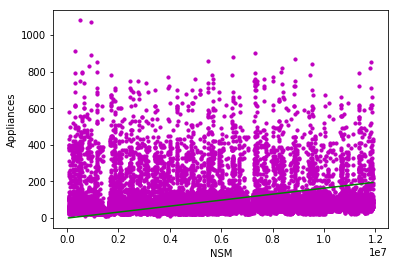

In [7]:
 #Energy used depending upon the hour
def main():
    # observations
    x = data.NSM
    y = data.Appliances
 
    # estimating coefficients
    b = estimate_coef(x, y)
    plt.xlabel('NSM')
    plt.ylabel('Appliances')
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
    
if __name__ == "__main__":
    main()

In [8]:
from statsmodels.formula.api import ols
model = ols("data.Appliances ~ data.NSM", data).fit()#Where data.NSM is an exogenues

In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        data.Appliances   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.830
Date:                Fri, 16 Mar 2018   Prob (F-statistic):              0.176
Time:                        17:52:11   Log-Likelihood:            -1.1938e+05
No. Observations:               19735   AIC:                         2.388e+05
Df Residuals:                   19733   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.4226      1.471     67.595      0.0

# Deductions

1. Single variables are not making any huge impact on the Appliances Value
2. However, with the value of the Condition number in the last regression, we now know that the NSM (the number of seconds from midnight for eachday (NSM)) is making a great impact on the Appiances value(As discussed in Paper 1 as well)